In [2]:
import pandas as pd

true = pd.read_csv("../data/raw/True.csv")
fake = pd.read_csv("../data/raw/Fake.csv")

true['label'] = 0  # Real news
fake['label'] = 1  # Fake news

In [4]:
df = pd.concat([true, fake]).sample(frac=1).reset_index(drop=True)
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.info())
print(df.head())

Shape: (44898, 5)
Columns: ['title', 'text', 'subject', 'date', 'label']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None
                                               title  \
0  Apple tax row raises $2.1 trillion question fo...   
1  Coca, trafficking greatest threats to Colombia...   
2   WATCH: Gay Cyclist Shuts Down Hate Preacher W...   
3  WATCH: SMARTPHONE CAPTURES NEW BOATLOAD OF “Sc...   
4  Holding keys to debt limit, Democrats weigh ta...   

                                                text       subject  \
0  LONDON (Reuters) - If the fallout from a huge ...  politicsNews   
1  BOGOTA (Reuters) - A peac

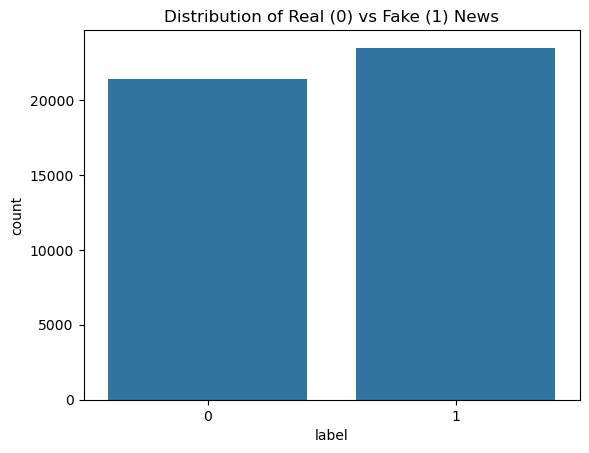

label
1    23481
0    21417
Name: count, dtype: int64


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="label", data=df)
plt.title("Distribution of Real (0) vs Fake (1) News")
plt.show()

print(df['label'].value_counts())

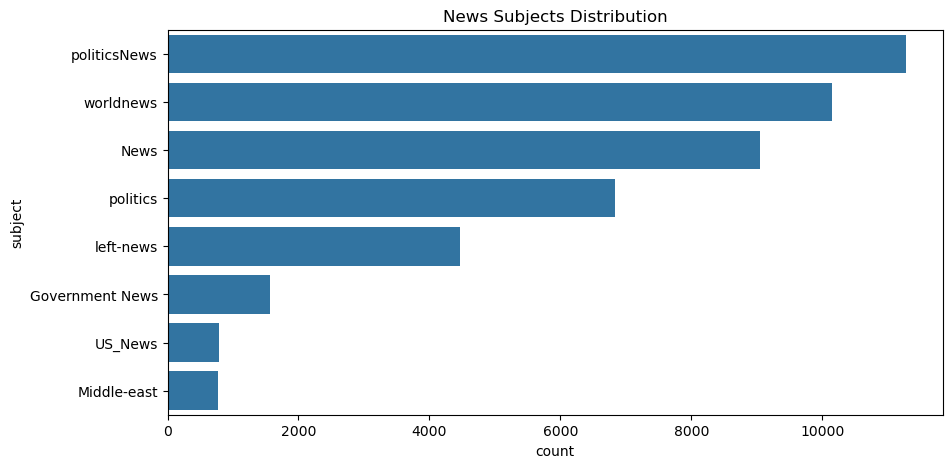

In [6]:
plt.figure(figsize=(10,5))
sns.countplot(y="subject", data=df, order=df['subject'].value_counts().index)
plt.title("News Subjects Distribution")
plt.show()

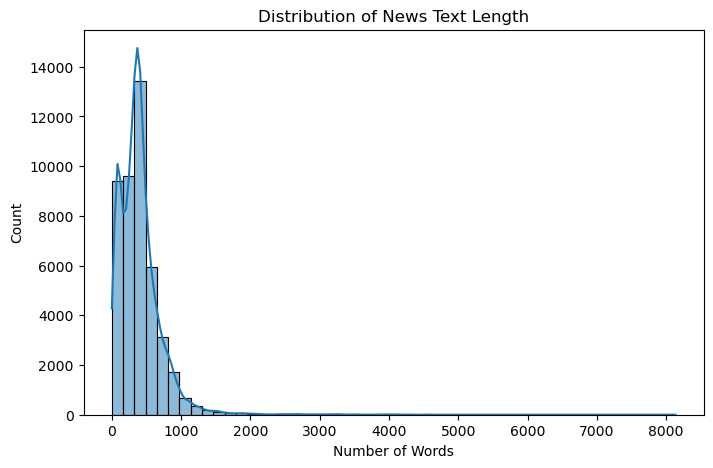

count    44898.000000
mean       405.282284
std        351.265595
min          0.000000
25%        203.000000
50%        362.000000
75%        513.000000
max       8135.000000
Name: text_len, dtype: float64


In [7]:
df['text_len'] = df['text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8,5))
sns.histplot(df['text_len'], bins=50, kde=True)
plt.title("Distribution of News Text Length")
plt.xlabel("Number of Words")
plt.show()

print(df['text_len'].describe())

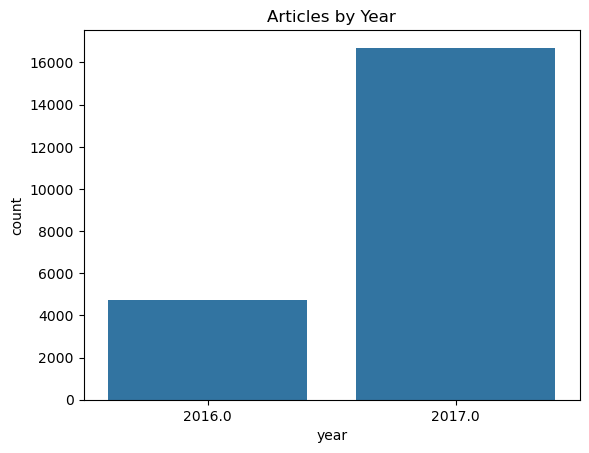

In [8]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year

sns.countplot(x="year", data=df)
plt.title("Articles by Year")
plt.show()

In [9]:
from collections import Counter

def get_top_n_words(corpus, n=20):
    words = " ".join(corpus).split()
    return Counter(words).most_common(n)

print("Top words in REAL news:", get_top_n_words(df[df['label']==0]['text'], 20))
print("Top words in FAKE news:", get_top_n_words(df[df['label']==1]['text'], 20))

Top words in REAL news: [('the', 422622), ('to', 243787), ('of', 204339), ('a', 187214), ('and', 179411), ('in', 169538), ('on', 104807), ('that', 82512), ('for', 77867), ('said', 72025), ('The', 55109), ('is', 54454), ('with', 53018), ('was', 47741), ('by', 46908), ('has', 46016), ('as', 45182), ('s', 44638), ('he', 43493), ('from', 38954)]
Top words in FAKE news: [('the', 483203), ('to', 286028), ('of', 233193), ('and', 213059), ('a', 202870), ('in', 152840), ('that', 138416), ('s', 127621), ('is', 105555), ('for', 88389), ('on', 76951), ('was', 66430), ('Trump', 64844), ('he', 62175), ('with', 60672), ('his', 55840), ('it', 53935), ('as', 51541), ('be', 47483), ('by', 45791)]


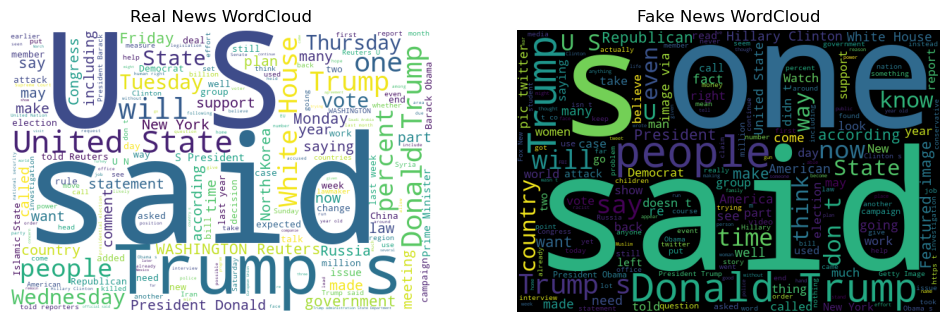

In [10]:
from wordcloud import WordCloud

real_wc = WordCloud(width=600, height=400, background_color="white").generate(" ".join(df[df['label']==0]['text']))
fake_wc = WordCloud(width=600, height=400, background_color="black").generate(" ".join(df[df['label']==1]['text']))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(real_wc)
plt.axis("off")
plt.title("Real News WordCloud")

plt.subplot(1,2,2)
plt.imshow(fake_wc)
plt.axis("off")
plt.title("Fake News WordCloud")

plt.show()

In [11]:
print(df.isnull().sum())

title           0
text            0
subject         0
date        23481
label           0
text_len        0
year        23481
dtype: int64
